# antenna pattern supernova SN2017gax

# right ascension and declination

In [ ]:
import numpy as np
# DATA: https://wis-tns.weizmann.ac.il/object/2017gax
# RA = 04:45:49.430 (71.455958) DEC = -59:14:42.56 (-59.245156)

# transform RA and DEC from h:m:s to rad
# formula: https://physics.stackexchange.com/questions/224950/how-can-i-convert-right-ascension-and-declination-to-distances
# 𝛼 = (𝑅𝐴ℎ∗15+𝑅𝐴𝑚/4+𝑅𝐴𝑠/240)×𝜋/180 right ascension
r_a = (4 * 15 + (45/4) + (49/240)) * (np.pi/180)
# 𝛿 = (𝐷𝐸𝑑±𝐷𝐸𝑚/60±𝐷𝐸𝑠/3600)×𝜋/180 declination
dec = (-59 - (14/60) - (42/3600)) * (np.pi/180)

print("Right ascension: %s "
      "Declination: %s " % (str(r_a), str(dec)))


# antenna pattern calculus PyCBC

In [ ]:
import numpy as np
import plotly.plotly 
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py
import plotly.graph_objs as go

import pycbc
from pycbc.detector import Detector

# Euler's angles 
theta = 1.23918376892 # right ascension
phi = -1.02974425868 # declination
psi = 0 # polarization

# declare time of earth rotation
time = 100

# array with observatories 
obs = [Detector("H1"), Detector("L1"), Detector("V1")]
obs_name = ["Hanford", "Livingston", "Virgo"]
#l1 = Detector("L1")
#v1 = Detector("V1")

# compute antenna pattern f-plus and f-cross for every detector
for detector in range(len(obs)):
    fp, fc = obs[detector].antenna_pattern(phi, theta, psi, time)
    fp2 = pow(fp, 2)
    fc2 = pow(fc, 2)
    f = pow((fp2 + fc2), 0.5)
    print(obs_name[detector])
    print(" Fp^2: %s\n Fc^2: %s\n sqrt{F}: %s\n" % (str(fp2), str(fc2), str(f)))


# antenna pattern, psi variable, Ligo&Virgo

In [1]:
import numpy as np
import pycbc
from pycbc.detector import Detector

# Right ascension and polarization phase runs from 0 to 2pi
# Declination runs from pi/2. to -pi/2 with the poles at pi/2. and -pi/2.
# Euler's angles 
theta = 1.23918376892 # right ascension
phi = -1.02974425868 # declination
psi = np.linspace(0, 2*np.pi, 20) # polarization 

# declare time of earth rotation
time = 100

# arrays with observatories 
obs = [Detector("H1"), Detector("L1"), Detector("V1")]
obs_name = ["Hanford", "Livingston", "Virgo"]

fp2 = []
fc2 = []
f = []

for detector in range(len(obs)):
    print(str(obs_name[detector]))
    for index in range(len(psi)):
        fp, fc = obs[detector].antenna_pattern(phi, theta, psi[index], time)
        fp2.append(pow(fp, 2))
        fc2.append(pow(fc, 2))
        f.append(pow((fp2[index] + fc2[index]), 0.5))
        # if you're courius about the numbers
        print(" Fp^2: %s\n Fc^2: %s\n sqrt{F}: %s\n" 
              % (str(fp2[index]), str(fc2[index]), str(f[index]))
             )


PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


Hanford
 Fp^2: 0.5578876330227048
 Fc^2: 0.17409015456522872
 sqrt{F}: 0.8555570042889798

 Fp^2: 0.7152062101547193
 Fc^2: 0.016771577433213926
 sqrt{F}: 0.8555570042889796

 Fp^2: 0.3455457206148729
 Fc^2: 0.3864320669730607
 sqrt{F}: 0.85555700428898

 Fp^2: 0.006734572780066699
 Fc^2: 0.725243214807867
 sqrt{F}: 0.85555700428898

 Fp^2: 0.21004862296999213
 Fc^2: 0.5219291646179414
 sqrt{F}: 0.8555570042889798

 Fp^2: 0.6486810681116837
 Fc^2: 0.08329671947624974
 sqrt{F}: 0.8555570042889798

 Fp^2: 0.6607228168644943
 Fc^2: 0.07125497072343913
 sqrt{F}: 0.8555570042889798

 Fp^2: 0.22800252084002443
 Fc^2: 0.5039752667479089
 sqrt{F}: 0.8555570042889798

 Fp^2: 0.003507666756658127
 Fc^2: 0.7284701208312754
 sqrt{F}: 0.8555570042889798

 Fp^2: 0.32600750555061236
 Fc^2: 0.40597028203732094
 sqrt{F}: 0.8555570042889797

 Fp^2: 0.7088404196923052
 Fc^2: 0.0231373678956286
 sqrt{F}: 0.85555700428898

 Fp^2: 0.5743004297415606
 Fc^2: 0.15767735784637296
 sqrt{F}: 0.8555570042889798

 

# approximants avaiable for bursts

In [10]:
import pycbc
from pycbc.detector import Detector
from pycbc.waveform import get_td_waveform

pycbc.waveform.waveform.print_sgburst_approximants()

LalSimulation Approximants
  IMRPhenomD_NRTidal
  TaylorF2
  TaylorF2Ecc
  SEOBNRv2_ROM_EffectiveSpin
  IMRPhenomA
  IMRPhenomC
  SEOBNRv1_ROM_EffectiveSpin
  IMRPhenomD
  SpinTaylorT2Fourier
  SpinTaylorT4Fourier
  TaylorF2NLTides
  SEOBNRv2_ROM_DoubleSpin
  IMRPhenomP
  SEOBNRv4_ROM_NRTidal
  SpinTaylorF2
  IMRPhenomPv2_NRTidal
  IMRPhenomHM
  SEOBNRv2_ROM_DoubleSpin_HI
  EOBNRv2_ROM
  SEOBNRv1_ROM_DoubleSpin
  EccentricFD
  SEOBNRv4_ROM
  IMRPhenomB
  EOBNRv2HM_ROM
  TaylorF2RedSpinTidal
  IMRPhenomPv2
  TaylorF2RedSpin
  Lackey_Tidal_2013_SEOBNRv2_ROM
  NRSur4d2s
  SEOBNRv4T_surrogate


# hp, hc polarization calculus for an hypothetical burst source

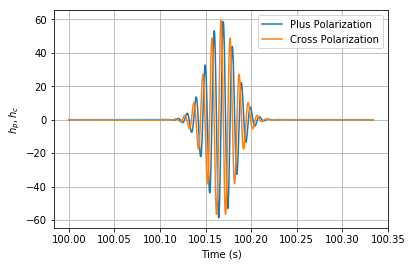

In [18]:
import pycbc
from pycbc.detector import Detector
from pycbc.waveform import get_td_waveform
import pylab 

# Euler's angles
theta = 1.23918376892 # right ascension
phi = -1.02974425868 # declination
psi = 0 # polarization 
inc = 0
time = 100

# get_sgburst_waveform return the plus and cross polarizations of a time domain 
# sine-Gaussian burst waveform
hc, hp = pycbc.waveform.waveform.get_sgburst_waveform(approximant = 'EOBNRv2_ROM',
                                            q = 10,
                                            frequency = 100,
                                            delta_t = 1.0/4096,
                                            hrss = 10,
                                            amplitude = 1)

# the projection process can also take into account the rotation of the
# earth using the project wave function.
hp.start_time = hc.start_time = time

# graphic
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hc.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('$h_p, h_c$')
pylab.legend()
pylab.grid()
pylab.show()

# antenna patter and waveform for an hypothetical burst source
# Ligo and Virgo

('Hanford', 'fp: -0.0640143107854485, fc: -0.9701761857539163')
('Livingston', 'fp: -0.02110752945245005, fc: 0.8054176874376586')
('Virgo', 'fp: 0.2222940088951028, fc: 0.2294104088073024')


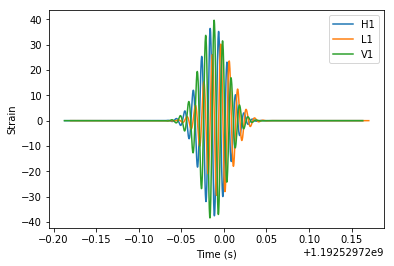

In [30]:
import pycbc
from pycbc.detector import Detector
from pycbc.waveform import get_td_waveform
import pylab

# time, orientation and location of the source in the sky
theta = 1.23918376892 # right ascension
phi = -1.02974425868 # declination
psi = 0 # polarization 
inc = 0
time = 1000000000

lab = [Detector('H1'), Detector('L1'), Detector('V1')]
det = ["Hanford", "Livingston", "Virgo"]

fp = []
fc = []

for index in range(len(lab)):
    fp_aux, fc_aux = lab[index].antenna_pattern(theta, phi, psi, time)
    fp.append(fp_aux)
    fc.append(fc_aux)
    print(det[index],
          "fp: %s, fc: %s" % (str(fp[index]), str(fc[index]))
         )
    
# return the plus and cross polarizations of a time domain sine-Gaussian burst waveform.
hc, hp = pycbc.waveform.waveform.get_sgburst_waveform(approximant = 'EOBNRv2_ROM',
                                            q = 10,
                                            frequency = 100,
                                            delta_t = 1.0/4096,
                                            hrss = 10,
                                            amplitude = 1)
end_time = 1192529720
hp.start_time += end_time
hc.start_time += end_time

# set y-axis
signal_h1 = lab[0].project_wave(hp, hc,  phi, theta, psi)
signal_l1 = lab[1].project_wave(hp, hc,  phi, theta, psi)
signal_v1 = lab[2].project_wave(hp, hc,  phi, theta, psi)

# set x-axis
x_h1 = signal_h1.sample_times
x_l1 = signal_l1.sample_times
x_v1 = signal_v1.sample_times

pylab.plot(signal_h1.sample_times, signal_h1, label='H1')
pylab.plot(signal_l1.sample_times, signal_l1, label='L1')
pylab.plot(signal_v1.sample_times, signal_v1, label='V1')

pylab.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.legend()
pylab.show()